In [1]:
import following_data as fd

In [2]:
import util 
import os

In [3]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [4]:
from tqdm import tqdm
import ast

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

In [6]:
ob = fd.twitter_following()
api = ob.api

In [ ]:
df = pd.read_csv("/Users/akshayuppal/Desktop/twitter_juul/input/final_following_data.csv",index_col=None)

In [ ]:
len(df)

In [8]:
userIDs = list(df.userID.astype(int))

NameError: name 'df' is not defined

In [15]:
## creation of the adjacency matrix
mat = np.empty((0,len(df.userID)))
with tqdm(total=(len(list(df.iterrows())))) as pbar:
    for index,row in df.iterrows():
        pbar.update(1)   
        friends = ast.literal_eval(row['following'])
        user = row['userID']
        a = list()
        for neighbor in (userIDs):
            if user == neighbor:
                a.append(0)
            else:
                if len(friends) is 5000:
                    a.append(-1)         # as the api GET friends/ids has a limit of 5000 friends
                if neighbor in friends:
                    a.append(1)
                else:
                    a.append(0)
        mat = np.vstack((mat,a))

100%|██████████| 7203/7203 [12:16<00:00,  6.51it/s]


In [9]:
# save file in input dir
filename_output = os.path.join(util.inputdir, "pairwise_mat" + '.csv')        
columns = userIDs
df = pd.DataFrame(mat, columns=columns, index=columns)
df.to_csv(filename_output)

NameError: name 'userIDs' is not defined

In [12]:
## import the file 
df = pd.read_csv("/Users/akshayuppal/Desktop/thesis/twitter_juul/input/pairwise_mat.csv",index_col=0)

In [13]:
df

,2918018660,485212274,28747090,54585605,2908532184,14997071,21569394,35405464,589640794,15359674,...,1022170000000000000,200338493,1046800000000000000,987919000000000000,56254987,2407617188,1045180000000000000.1,265226784,390399332,87425704
2918018660,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
485212274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28747090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54585605,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2908532184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14997071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21569394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35405464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
589640794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15359674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# check for -1 value
df.apply(lambda x: -1 in x.values, axis=1).any()
# so no -1 awesome

False

In [15]:
outdegree = df.sum(axis=1)

In [16]:
indegree = df.sum(axis=0)

In [18]:
outdegree.sort_values(ascending=False,inplace=True)
indegree.sort_values(ascending=False,inplace=True)

In [83]:
grouped_out = outdegree.groupby(outdegree).count().sort_values(ascending=False)
grouped_in = indegree.groupby(indegree).count().sort_values(ascending=False)

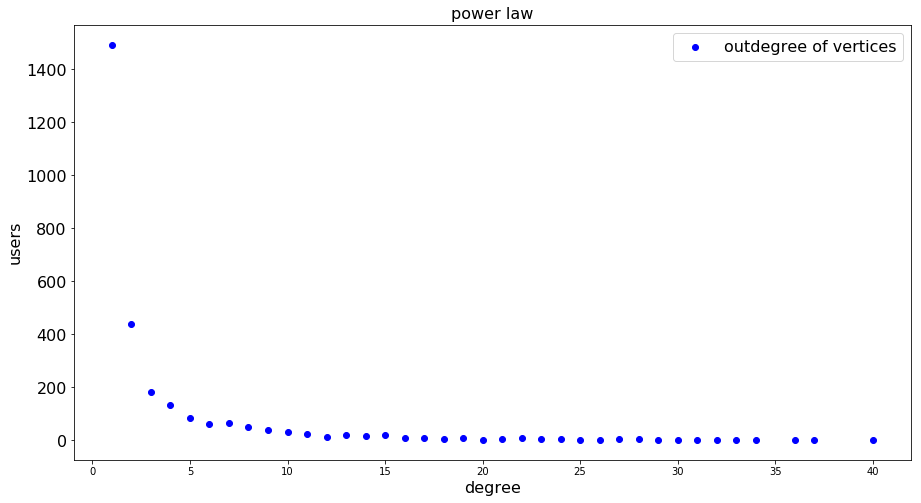

In [92]:
## power law
plt.rcParams["figure.figsize"] = (15,8)
plt.scatter(list(grouped_out.index)[1:],list(grouped_out.values)[1:],color = 'blue', label='outdegree of vertices')
plt.xlabel("degree", fontsize = 16)
plt.ylabel("users", fontsize = 16)
plt.legend(fontsize=16)
plt.yticks(fontsize=16)
plt.title("power law",fontsize=16)
plt.show()

In [ ]:
# outdegree variation of first top 30 user
plt.rcParams["figure.figsize"] = (20,6)
plt.scatter([str(x) for x in outdegree.index][:30],list(outdegree.values)[:30],color = 'blue', label='outdegree of vertices')
plt.xlabel("users", fontsize = 16)
plt.ylabel("outdegree", fontsize = 16)
plt.xticks(rotation=45,ha="right")
plt.legend(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [37]:
# getting the max
outdegree[outdegree == outdegree.max()]

1016880000000000000    40.0
dtype: float64

In [ ]:
# outdegree variation of first top 100 user
plt.rcParams["figure.figsize"] = (30,10)
plt.scatter([str(x) for x in outdegree.index][:100],list(outdegree.values)[:100],color = 'blue', label='outdegree of vertices')
plt.xlabel("users", fontsize = 2)
plt.ylabel("outdegree", fontsize = 24)
plt.xticks(rotation=45,ha="right")
plt.yticks(fontsize=16)
plt.legend(fontsize=22)
plt.show()

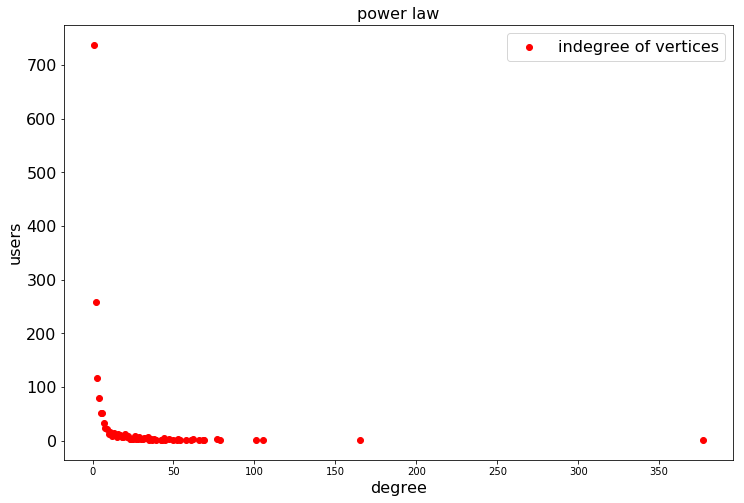

In [95]:
# power law
plt.rcParams["figure.figsize"] = (12,8)
plt.scatter(list(grouped_in.index)[1:],list(grouped_in.values)[1:],color = 'red', label='indegree of vertices')
plt.xlabel("degree", fontsize = 16)
plt.ylabel("users", fontsize = 16)
plt.legend(fontsize=16)
plt.yticks(fontsize=16)
plt.title("power law",fontsize=16)
plt.show()

In [ ]:
# plotting the indegree
plt.rcParams["figure.figsize"] = (20,6)
plt.scatter([str(x) for x in indegree.index][:30],list(indegree.values)[:30],color = 'red', label='indegree of vertices')
plt.xlabel("users", fontsize = 16)
plt.ylabel("outdegree", fontsize = 16)
plt.xticks(rotation=45,ha="right")
plt.legend(fontsize=16)
plt.yticks(fontsize=16)

In [ ]:
# power law for indegree


In [99]:
# getting the max indegree
indegree[indegree == indegree.max()]

2918018660    377.0
dtype: float64

In [20]:
## getiing the graph
G = nx.from_numpy_matrix(mat,parallel_edges = True,create_using=nx.MultiDiGraph())

In [24]:
#relabel nodes
labels = {idx:user for idx,user in enumerate(userIDs)}

In [25]:
G = nx.relabel_nodes(G, labels)

In [ ]:
# spectral 
plt.figure(figsize=(100,100)) 
nx.draw(G,pos= nx.draw_spectral(G) )
plt.savefig("pairwise_spectral", format="PNG",dpi=fig.dpi)

In [ ]:
# nx.draw_spring(G)
plt.figure(figsize=(100,100)) 
nx.draw(G,pos= nx.draw_spring(G) )
plt.savefig("pairwise_spring", format="PNG",dpi=fig.dpi)